In [1]:
#library(edgeR)
#library(RColorBrewer)
library (tidyverse)
library (openxlsx)
library(magrittr)  
library (statmod)
library(ggrepel)
library (cowplot)
#library (circlize)
library (reshape2)
library (readr)
library (ggpubr)
#library (eulerr)
#library (ComplexHeatmap)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




In [2]:
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

In [5]:
#long = read.table("./data/expressiontable_nonlog.tsv", sep = '\t',  header = T)
long = read.table("./data/f_CA2021_inlog_FC15_FC2_evidence-threshold_final.tsv", sep = '\t', header = T, row.names =1)#row.names =1, 
#long = read.table("../2022_Doseresponse/data/f_CA2021_inlog_FC15_FC2_evidence-threshold_v3.tsv", sep = '\t', header = T, row.names =1)#row.names =1, 

In [6]:
metabol = c("DHCR7", "CYP2R1", "CYP27A1", "CYP27B1", "CYP24A1")

In [7]:
long2 = long %>%
filter (., row.names(.) %in% metabol)

head (long2)

,EtOH_x_04h_R1,EtOH_x_04h_R2,EtOH_x_04h_R3,EtOH_x_08h_R1,EtOH_x_08h_R2,EtOH_x_08h_R3,EtOH_x_24h_R1,EtOH_x_24h_R2,EtOH_x_24h_R3,V125D3_0.1nM_24h_R1,⋯,ensembl_gene_id,entrezgene_id,external_gene_name,description,chromosome_name,start_position,end_position,gene_biotype,strand,ref_206
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
CYP24A1,0.1689674,0.4891467,0.6090954,8.619740,8.689233,8.570202,7.0281908,8.8271080,8.153132,8.137063,⋯,ENSG00000019186,1591,CYP24A1,cytochrome P450 family 24 subfamily A member 1,20,54153446,54173986,protein coding,-1,yes
CYP27A1,5.4053908,5.2811330,5.3165515,6.852982,6.834079,7.100526,6.6276068,6.6624312,7.083301,5.715863,⋯,ENSG00000135929,1593,CYP27A1,cytochrome P450 family 27 subfamily A member 1,2,218781749,218815293,protein coding,1,yes
CYP27B1,1.2430393,0.9497351,1.9255715,1.371835,0.732087,1.094899,0.9934789,0.6101155,1.001807,0.711605,⋯,ENSG00000111012,1594,CYP27B1,cytochrome P450 family 27 subfamily B member 1,12,57762334,57768986,protein coding,-1,no
CYP2R1,4.8683690,4.7267784,4.9579944,4.699841,4.757736,4.596382,4.6674173,4.6903097,4.529176,4.481318,⋯,ENSG00000186104,120227,CYP2R1,cytochrome P450 family 2 subfamily R member 1,11,14877440,14892231,protein coding,-1,no
DHCR7,3.5621306,3.6426540,3.7594485,3.478896,3.676554,3.930056,3.5715549,3.3811279,3.523535,3.378461,⋯,ENSG00000172893,1717,DHCR7,7-dehydrocholesterol reductase,11,71428193,71452868,protein coding,-1,no


In [8]:
#because dplyr conflicting with drc, old fashioned way

CCcols_Ind = as.vector (c(
  
  "EtOH_x_04h_R1",
  "EtOH_x_04h_R2",
  "EtOH_x_04h_R3",
  
  "EtOH_x_08h_R1",
  "EtOH_x_08h_R2",
  "EtOH_x_08h_R3",
  
  "EtOH_x_24h_R1",
  "EtOH_x_24h_R2",
  "EtOH_x_24h_R3",
  
#  "V125D3_1nM_04h_R1",
#  "V125D3_1nM_04h_R2",
#  "V125D3_1nM_04h_R3",
  
#  "V125D3_1nM_08h_R1",
#  "V125D3_1nM_08h_R2",
#  "V125D3_1nM_08h_R3",
  
  "V125D3_1nM_24h_R1",
  "V125D3_1nM_24h_R2",
  "V125D3_1nM_24h_R3",
  
  "V125D3_10nM_04h_R1",
  "V125D3_10nM_04h_R2",
  "V125D3_10nM_04h_R3",
  
  "V125D3_10nM_08h_R1",
  "V125D3_10nM_08h_R2",
  "V125D3_10nM_08h_R3",
  
  "V125D3_10nM_24h_R1",
  "V125D3_10nM_24h_R2",
  "V125D3_10nM_24h_R3",
  
  "V25D3_1000nM_04h_R1",
  "V25D3_1000nM_04h_R2",
  "V25D3_1000nM_04h_R3",
  
  "V25D3_1000nM_08h_R1",
  "V25D3_1000nM_08h_R2",
  "V25D3_1000nM_08h_R3",
  
  "V25D3_1000nM_24h_R1",
  "V25D3_1000nM_24h_R2",
  "V25D3_1000nM_24h_R3",
  
  "V25D2_1000nM_04h_R1",
  "V25D2_1000nM_04h_R2",
  "V25D2_1000nM_04h_R3",
  
  "V25D2_1000nM_08h_R1",
  "V25D2_1000nM_08h_R2",
  "V25D2_1000nM_08h_R3",
  
  "V25D2_1000nM_24h_R1",
  "V25D2_1000nM_24h_R2",
  "V25D2_1000nM_24h_R3",
  
  
  "V125D3_10nM_24h_R1",
  "V125D3_10nM_24h_R2",
  "V125D3_10nM_24h_R3"#,
))

df_Ind = long2 [, CCcols_Ind]

In [9]:
d = df_Ind

In [10]:
df2_Ind = as.vector (colnames (d))
#df2_Ind

In [11]:
df_y = colsplit(df2_Ind, "_", c("treatment", "concentration","time","replicate"))
df_y = as.data.frame(unclass(df_y))
#df_y
df_y$Treatconcstudy <- factor(paste(df_y$treatment, df_y$time, sep="_"))
df_y$sample <- colnames(d)
#df_y

small_pwt_T = as.data.frame (t(d))
#small_pwt_T

small_pwt_T = small_pwt_T %>%
  rownames_to_column ("sample")
head (small_pwt_T)

,sample,CYP24A1,CYP27A1,CYP27B1,CYP2R1,DHCR7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,EtOH_x_04h_R1,0.1689674,5.405391,1.2430393,4.868369,3.562131
2,EtOH_x_04h_R2,0.4891467,5.281133,0.9497351,4.726778,3.642654
3,EtOH_x_04h_R3,0.6090954,5.316551,1.9255715,4.957994,3.759448
4,EtOH_x_08h_R1,8.6197402,6.852982,1.3718347,4.699841,3.478896
5,EtOH_x_08h_R2,8.6892326,6.834079,0.7320870,4.757736,3.676554
6,EtOH_x_08h_R3,8.5702019,7.100526,1.0948994,4.596382,3.930056


In [12]:
mrg = merge(x=small_pwt_T,y=df_y,by.x="sample", all.x =T)

mrg2 = mrg %>% 
  pivot_longer(all_of(metabol)) %>%  #eighthours
  arrange (name)

mrg2$name <- as.factor(mrg2$name)
head (mrg2)

sample,treatment,concentration,time,replicate,Treatconcstudy,name,value
<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<dbl>
EtOH_x_04h_R1,EtOH,x,04h,R1,EtOH_04h,CYP24A1,0.1689674
EtOH_x_04h_R2,EtOH,x,04h,R2,EtOH_04h,CYP24A1,0.4891467
EtOH_x_04h_R3,EtOH,x,04h,R3,EtOH_04h,CYP24A1,0.6090954
EtOH_x_08h_R1,EtOH,x,08h,R1,EtOH_08h,CYP24A1,8.6197402
EtOH_x_08h_R2,EtOH,x,08h,R2,EtOH_08h,CYP24A1,8.6892326
EtOH_x_08h_R3,EtOH,x,08h,R3,EtOH_08h,CYP24A1,8.5702019


In [13]:
# to plot for comparison v3
mrg2 = mrg2 %>%
  dplyr::group_by(time,name) %>% # works too Treatconcstudy,name
  dplyr::summarize(mean=mean(value), sd=sd(value))

mrg2

`summarise()` has grouped output by 'time'. You can override using the `.groups` argument.



time,name,mean,sd
<chr>,<fct>,<dbl>,<dbl>
04h,CYP24A1,3.5619997,2.1314928
04h,CYP27A1,4.6818155,0.4593639
04h,CYP27B1,0.8991959,0.5281523
04h,CYP2R1,4.7756091,0.1440057
04h,DHCR7,3.6595612,0.2216134
08h,CYP24A1,8.8831220,0.5039124
08h,CYP27A1,5.1615122,1.1052300
08h,CYP27B1,1.4025121,0.3878126
08h,CYP2R1,4.7122268,0.0982057


In [14]:
mrg2 = mrg2 %>%
  dplyr::group_by(time,name) %>% # works too Treatconcstudy,name
  dplyr::summarize(mean=mean(value), sd=sd(value))

mrg2

ERROR: Error: Problem with `summarise()` column `mean`.
[34mℹ[39m `mean = mean(value)`.
[31m✖[39m object 'value' not found
[34mℹ[39m The error occurred in group 1: time = "04h", name = CYP24A1.


In [15]:
mrg2$time <-factor (mrg2$time, levels = c("04h", "08h", "24h"))
mrg2$name <-factor (mrg2$name, levels = c("DHCR7", "CYP2R1", "CYP27A1", "CYP27B1", "CYP24A1"))

In [16]:
levels (mrg2$name)

[1] "DHCR7"   "CYP2R1"  "CYP27A1" "CYP27B1" "CYP24A1"

In [17]:
cols <- c("DHCR7" = "#DBC0BE", 
          "CYP27B1" = "#008394", 
          "CYP27A1" = "#F2666D",
          "CYP2R1" = "blue",
          "CYP24A1" = "red")

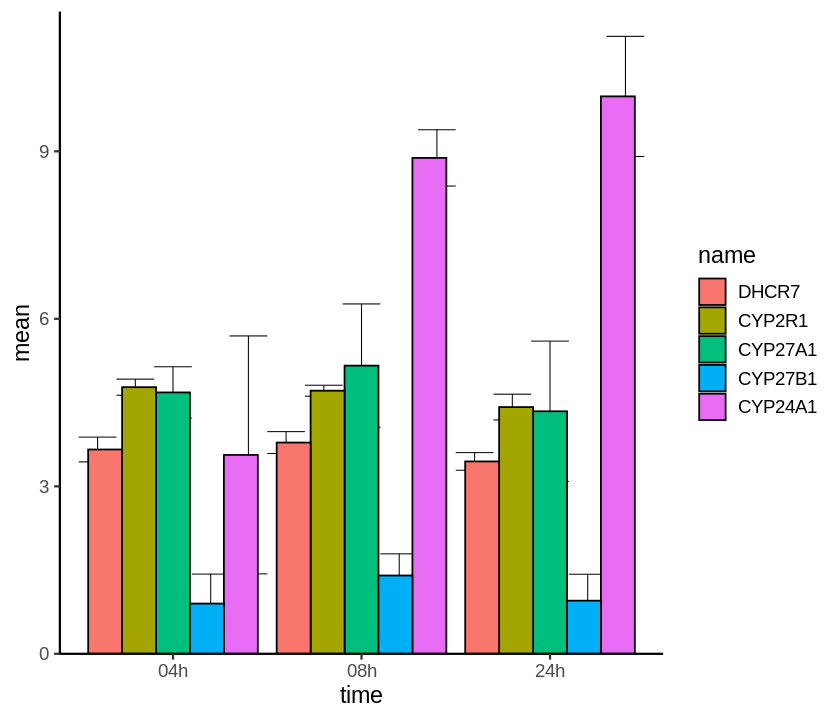

In [18]:
fig (7,6)

ggplot(mrg2, aes(x=time, y=mean, fill=name)) + 
geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd)
                                     , width=1, size = 0.29,
                                     position=position_dodge())+
  geom_bar(stat="identity", color="black", 
           position=position_dodge()
          ) +
theme_classic(base_size = 14,base_family = "sans")+
scale_y_continuous(expand = expansion(mult = c(0, 0.04)))+ 
    # theme_minimal()+ 
    theme_classic(base_size = 14,base_family = "sans")+
scale_colour_manual(values = cols)

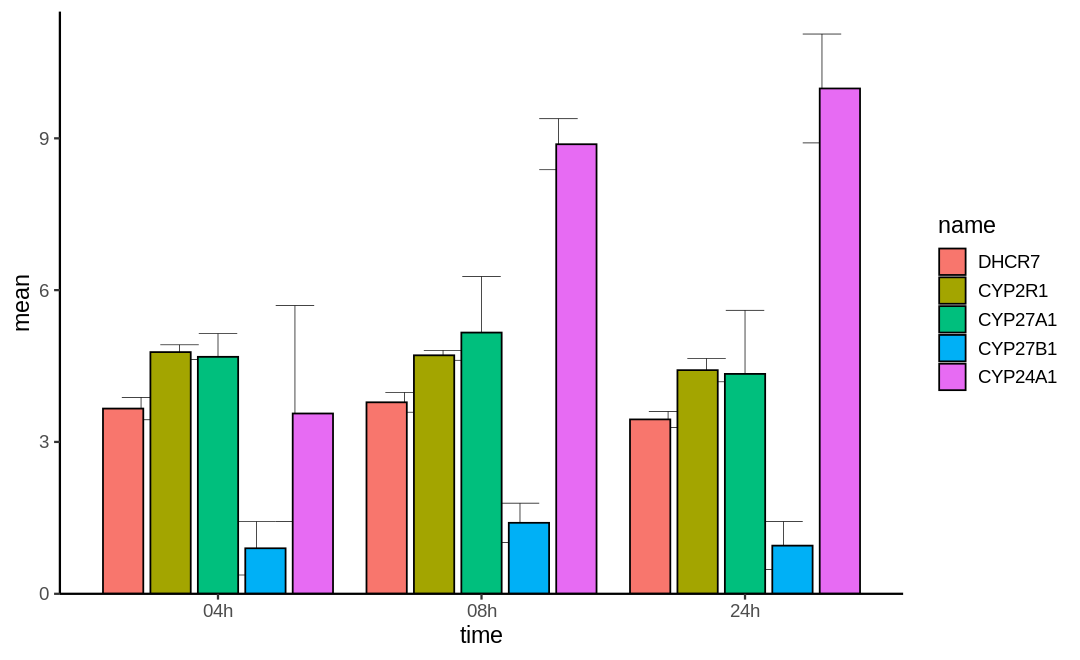

In [19]:
fig (9,5.5)

bars = ggplot(mrg2, aes(x=time, y=mean, fill=name)) + 
geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd)
                                     , width=0.73, size = 0.2,
                                      position=position_dodge(0.73))+
  geom_bar(stat="identity", color="black", 
            position=position_dodge2(width = 0.73, padding = 0.15)) +
theme_classic(base_size = 14,base_family = "sans")+
scale_y_continuous(expand = expansion(mult = c(0, 0.04)))+ 
    # theme_minimal()+ 
    theme_classic(base_size = 14,base_family = "sans")+
scale_colour_manual(values = cols)

bars

In [20]:
ggsave("./plots/Fig3D.pdf", 
       plot = bars, width = 9, height = 5.5)

In [21]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.5 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /research/users/andreha/miniconda3/envs/Mamba-14/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.4.0    reshape2_1.4.4  cowplot_1.1.1   ggrepel_0.9.1  
 [5] statmod_1.4.36  magrittr_2.0.1  openxlsx_4.2.5  forcats_0.5.1  
 [9] stringr_1.4.0   dplyr_1.0.7     purrr_0.3.4     readr_2.1.1    
[13] tidyr_1.1.4     tibble_3.1.6    ggplot2_3.3.5   tidyverse_1.3.1

